About this file

The significant earthquake dataset 1900-2023 is a highly detailed dataset compiled by the United States Geological Survey (USGS). It is an extensive and up-to-date collection of significant earthquake events that have occurred globally over the past 123 years. The dataset contains over 37,000 records of earthquake events with a magnitude of 5.5 or higher on the Richter scale

* Time: 
    Earthquake Time is a term used to refer to the exact date and time an earthquake event occurred
* Place:
    Earthquake Place is a dataset that contains information about significant earthquake events from around the world.quake Time
* Latitude
* Longitude
* Depth:
    Earthquake depth is a measure of the distance from the Earth's surface to the point where an earthquake occurs.
* Mag: 
    Magnitude is a measure of the energy released during an earthquake. It is determined by the size of the seismic waves generated by the earthquake and is typically expressed on the Richter scale, which ranges from 0 to 10.

* MagType:
    Magnitude type refers to the method or formula used to determine the magnitude of an earthquake. There are several different magnitude types that are used by seismologists, including the Richter scale, the moment magnitude scale, the surface wave magnitude scale, and the body wave magnitude scale. Each magnitude type has its own strengths and limitations, and the choice of magnitude type depends on the specific characteristics of the earthquake being measured.


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import os
import requests
from PIL import Image
from io import BytesIO
from sklearn import preprocessing

In [27]:
## working directory
os.chdir('/Users/timothymiller/Documents/GitHub')

In [28]:
earthquake = pd.read_csv('EarthquakeAnalysis/earthquake.csv')

In [29]:
earthquake.shape

(37331, 23)

In [30]:
earthquake.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [31]:
# clean up data / time
earthquake['Time'] = pd.to_datetime(earthquake['Time'])
#earthquake['Time'] = earthquake['Time'].apply(lambda x: x.strftime('%m/%d/%Y %H:%M'))


In [32]:
# earthquake['Time'].head()

In [33]:
print('First EQ in Data: ', earthquake['Time'].min())
print('Last EQ in Data: ', earthquake['Time'].max())

First EQ in Data:  1900-10-09 12:25:00+00:00
Last EQ in Data:  2023-02-17 09:37:34.868000+00:00


In [34]:
list(earthquake.columns)

['Time',
 'Place',
 'Latitude',
 'Longitude',
 'Depth',
 'Mag',
 'MagType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'ID',
 'Updated',
 'Unnamed: 14',
 'Type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [35]:
# drop unnecessary columns
earthquake = earthquake.drop('Unnamed: 14', axis = 1)

In [36]:
earthquake.iloc[:, 0:12].describe()

,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms
count,37331.000000,37331.000000,37197.000000,37331.000000,7473.000000,10087.000000,4395.000000,20218.000000
mean,5.457651,38.877695,58.583346,5.948616,265.481065,45.014891,4.315178,1.000779
std,30.789822,123.090934,109.563400,0.455160,161.982149,34.311032,5.480411,0.356822
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,8.000000,0.004505,0.005000
25%,-16.519800,-75.807000,15.000000,5.600000,134.000000,24.100000,1.155000,0.890000
50%,1.153000,98.577000,28.500000,5.800000,241.000000,36.000000,2.509000,1.000000
75%,33.786000,143.347850,41.000000,6.140000,372.000000,54.800000,5.127500,1.110000
max,87.199000,180.000000,700.000000,9.500000,934.000000,360.000000,39.730000,42.410000


In [37]:
earthquake.iloc[:, 13:22].describe()

,horizontalError,depthError,magError,magNst
count,3970.000000,20827.000000,16551.000000,5372.000000
mean,7.324982,10.679092,0.261882,46.974870
std,5.400729,10.660510,0.169566,60.441745
min,0.085000,0.000000,0.000000,0.000000
25%,5.700000,3.600000,0.200000,17.000000
50%,7.100000,6.100000,0.200000,31.000000
75%,8.500000,16.200000,0.330000,55.000000
max,99.000000,569.200000,1.840000,941.000000


# Initial Analysis

In [38]:
# Magnitude
print('Magnitude')
print('Minimum: ', earthquake['Mag'].min())
print('Mean: ', earthquake['Mag'].mean())
print('Maximum: ', earthquake['Mag'].max())

Magnitude
Minimum:  5.5
Mean:  5.9486158956364745
Maximum:  9.5


Text(1.55, 7.5, 'Most Earthquakes are between 5.5 - 7.0 in magnitude.')

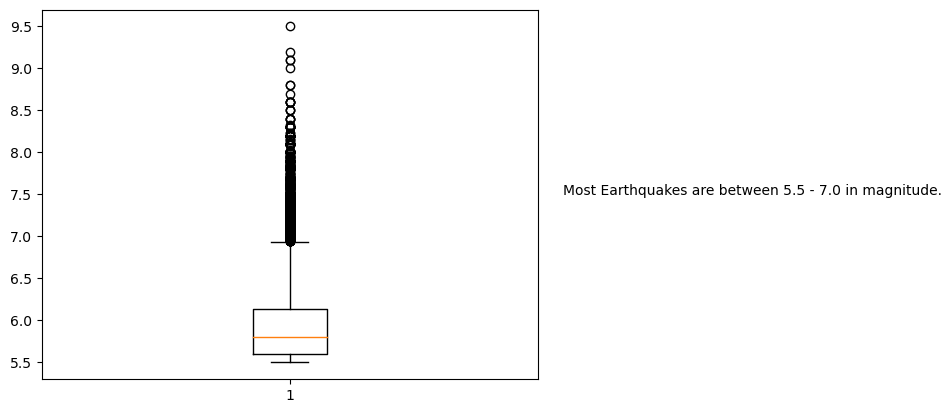

In [39]:
# Boxplot of magnitude
plt.boxplot(earthquake['Mag'])
plt.text(1.55, 7.5, 'Most Earthquakes are between 5.5 - 7.0 in magnitude.')


### Great Quakes

In [40]:
# great earthquakes (mag >= 8.0)
great_quakes = earthquake[earthquake['Mag'] >= 8.0]

In [41]:
len(great_quakes)

98

In [42]:
# create a map centered at a specific latitude and longitude
map = folium.Map(location=[0, 0], zoom_start=1.5)

# add a marker for each datapoint
for index, row in great_quakes.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(map)

# display the map
map


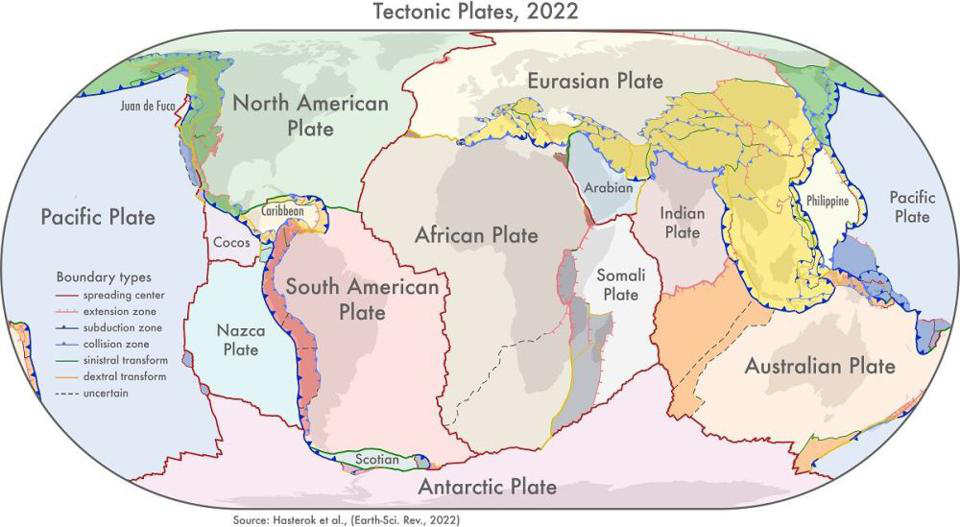

In [43]:
# For comparison, image of tectonic plates
url = 'https://imageio.forbes.com/specials-images/imageserve/62a1f7be14838102fd739c43/Hasteroketal-2022-TectonicMap/960x0.jpg?format=jpg&width=960'
response = requests.get(url)
Image.open(BytesIO(response.content))


### What is the best predictor for Magnitude of earthquake? 

In [44]:
df = earthquake
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

In [45]:
df.dtypes

Time               datetime64[ns, UTC]
Place                           object
Latitude                       float64
Longitude                      float64
Depth                          float64
Mag                            float64
MagType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
ID                              object
Updated                         object
Type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
year                             int64
month                            int64
day                              int64
hour                     

In [46]:
df = df.drop('ID', axis=1)
df = df.drop('Updated', axis=1)
df = df.drop('Place', axis=1)
df = df.drop('Time', axis=1)

In [47]:
le = preprocessing.LabelEncoder()
MagType_num = le.fit_transform(df['MagType'])
net_num = le.fit_transform(df['net'])
type_num = le.fit_transform(df['Type'])
status_num = le.fit_transform(df['status'])
locationSource_num = le.fit_transform(df['locationSource'])
magSource_num = le.fit_transform(df['magSource'])

In [48]:
df['MagType'] = MagType_num
df['net'] = net_num
df['Type'] = type_num
df['status'] = status_num
df['locationSource'] = locationSource_num
df['magSource'] = magSource_num

In [49]:
df.dtypes

Time               datetime64[ns, UTC]
Place                           object
Latitude                       float64
Longitude                      float64
Depth                          float64
Mag                            float64
MagType                          int64
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                              int64
Type                             int64
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                           int64
locationSource                   int64
magSource                        int64
year                             int64
month                            int64
day                              int64
hour                             int64
minute                           int64
second                   